# Imports

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import read_desi_data_file, get_average_intensity_of_scan, get_spots, combine_scans, mass_to_monomer
from utils import identify_masses_from_sequencing, find_parent_mass


Setting threshold to 50295.44857485754 counts
[INFO] Found 6 extrema in the spot scan. This means there are six peaks/samples.
Extreme point 3 has scans [0, 1, 2, 3, 4, 5, 6]
Extreme point 12 has scans [10, 11, 12, 13, 14, 15]
Extreme point 24 has scans [22, 23, 24, 25, 26]
Extreme point 35 has scans [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Extreme point 46 has scans [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Extreme point 57 has scans [55, 56, 57, 58]


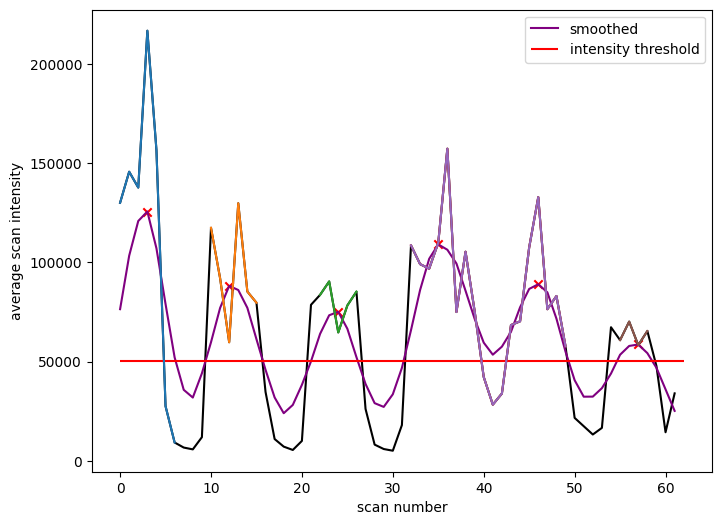

[[0, 1, 2, 3, 4, 5, 6], [10, 11, 12, 13, 14, 15], [22, 23, 24, 25, 26], [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [55, 56, 57, 58]]


In [2]:
endcap_mass = 262.084
endcap_name = 'Tyr(OMe)'

# this is the scan intensity that you check to see what is noise and what is oligos
intensity_threshold = 'auto'

# Set the maximum spot width
spot_width = 6

# Debug
debug = True

# Rounding for something in the reading/cleaning up of scans
mz_round = 3

# Define the monomer masses
MonomerMasses = {
    101.0477:'Ala',
    103.0602:'D2Ala',
    115.0633:'Abu',
    117.0759:'D2Abu',
    127.0633:'Gly(allyl)',
    129.0759:'D2Allyl',
    131.0582:'Ser',
    133.0708:'D2Ser',
    143.0946:'Leu',
    145.1072:'D2Leu',
    177.0790:'Phe',
    179.0915:'D2Phe',
    183.1259:'Cha',
    185.1385:'D2Cha',
    191.0949:'HoPhe',
    193.0739:'Tyr(OH)',
    193.1072:'D2HoPhe',
    195.0864:'D2Tyr(OH)',
    207.0895:'TyrOMe',
    209.1021:'D2TyrOMe',
}

#file = Path('./julia_data/04172024_oligomers_CVprofiling_A-F_3rdtry.txt')
file = Path('./julia_data/04172024_oligomers_CVprofiling_A-F_2ndtry.txt')

# Get a list of scans in the file
scans = read_desi_data_file(file, mz_round=mz_round)

# Get the average intensities
average_scan_intensities = [get_average_intensity_of_scan(x, mass_thresh=500) for x in scans]

# Get the spots from the spectrum
spots = get_spots(intensities=average_scan_intensities, 
                  threshold=intensity_threshold, 
                  spot_width=spot_width, 
                  look_ahead_bias=1,
                  polyorder=2,
                  plot_smoothed=True,
                  debug=debug)

print(spots)
spots = [[1, 2, 3, 4], [9, 10, 11, 12, 13, 14, 15], [19, 20, 21, 22, 23, 24], [29, 30, 31, 32, 33, 34, 35, 36], [40, 41, 42, 43, 44, 45], [50, 51, 52, 53, 54, 55, 56]]

In [3]:

# Combine all of the scans that are associated with a peak in the
combined_scans = [combine_scans([scans[i] for i in spot_group]) for spot_group in spots]

[WARNING] Small parent peaks can cause unusual results with thresholds larger than 0.01.
[DEBUG] spot_idx: 0	Parent mass in spectrum: 1480.793	Intensity: 10554313.0
[DEBUG] intensity_percent: 0.2	first intensity_threshold: 9387999.200000001	LargestMassPeakIntensity: 10554313.0 counts.
[DEBUG] In endcap range 157.90685799999997 - 272.16425399999997
[DEBUG] Upperbound mass 163.057254 was lower than the minimum mass 262.084
[DEBUG] Selected masses: [1480.793, 1303.714, 1158.606, 1025.535, 818.445, 633.307, 502.249, 371.191, 262.084]
	MONOMER: 1480.793 - Phe
	MONOMER: 1303.714 - D2Leu
	MONOMER: 1158.606 - D2Ser
	MONOMER: 1025.535 - TyrOMe
	MONOMER: 818.445 - D2Cha
	MONOMER: 633.307 - Ser
	MONOMER: 502.249 - Ser
	MONOMER: 371.191 - Abu
	ENDCAP : 262.084 (target=262.084) - Tyr(OMe)


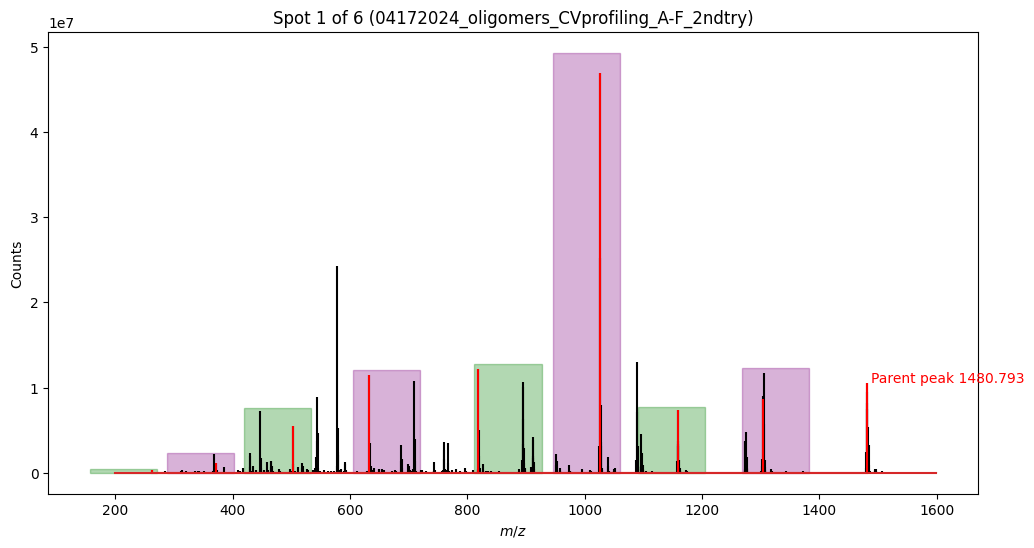

[WARNING] Small parent peaks can cause unusual results with thresholds larger than 0.01.
[DEBUG] spot_idx: 1	Parent mass in spectrum: 1526.829	Intensity: 6782541.0
[DEBUG] intensity_percent: 0.2	first intensity_threshold: 3463508.2	LargestMassPeakIntensity: 6782541.0 counts.
[DEBUG] In endcap range 227.890858 - 342.148254
[DEBUG] Upperbound mass 163.057254 was lower than the minimum mass 262.084
[DEBUG] Selected masses: [1526.829, 1349.751, 1164.611, 1021.516, 836.377, 719.301, 542.223, 441.175, 262.084]
	MONOMER: 1526.829 - Phe
	MONOMER: 1349.751 - D2Cha
	MONOMER: 1164.611 - Leu
	MONOMER: 1021.516 - D2Cha
	MONOMER: 836.377 - D2Abu
	MONOMER: 719.301 - Phe
	MONOMER: 542.223 - Ala
	MONOMER: 441.175 - D2Phe
	ENDCAP : 262.084 (target=262.084) - Tyr(OMe)


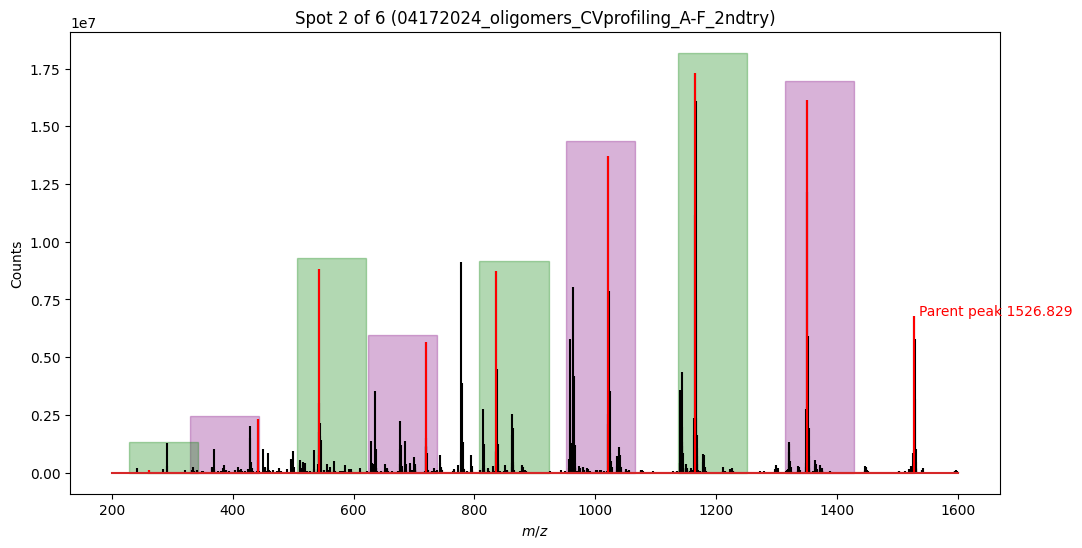

[WARNING] Small parent peaks can cause unusual results with thresholds larger than 0.01.
[DEBUG] spot_idx: 2	Parent mass in spectrum: 1594.769	Intensity: 720001.0
[DEBUG] intensity_percent: 0.2	first intensity_threshold: 3507279.6	LargestMassPeakIntensity: 720001.0 counts.
[DEBUG] In endcap range 225.878858 - 340.136254
[DEBUG] Upperbound mass 163.057254 was lower than the minimum mass 262.084
[DEBUG] Selected masses: [1594.769, 1417.688, 1240.61, 1049.514, 864.375, 747.3, 570.221, 439.163, 262.084]
	MONOMER: 1594.769 - Phe
	MONOMER: 1417.688 - Phe
	MONOMER: 1240.61 - HoPhe
	MONOMER: 1049.514 - D2Cha
	MONOMER: 864.375 - D2Abu
	MONOMER: 747.3 - Phe
	MONOMER: 570.221 - Ser
	MONOMER: 439.163 - Phe
	ENDCAP : 262.084 (target=262.084) - Tyr(OMe)


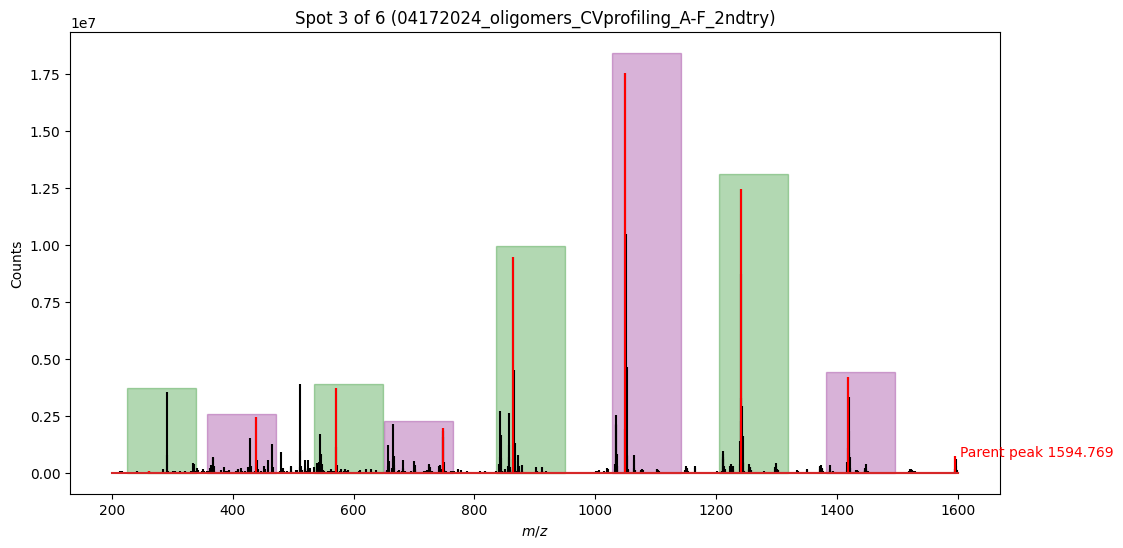

[WARNING] Small parent peaks can cause unusual results with thresholds larger than 0.01.
[DEBUG] spot_idx: 3	Parent mass in spectrum: 1290.61	Intensity: 3816673.0
[DEBUG] intensity_percent: 0.2	first intensity_threshold: 7366809.2	LargestMassPeakIntensity: 3816673.0 counts.
[DEBUG] In endcap range 149.84685799999997 - 264.10425399999997
[DEBUG] Upperbound mass 163.057254 was lower than the minimum mass 262.084
[DEBUG] Selected masses: [1290.61, 1113.531, 1012.482, 829.355, 726.295, 625.247, 494.19, 363.131, 262.084]
	MONOMER: 1290.61 - Phe
	MONOMER: 1113.531 - Ala
	MONOMER: 1012.482 - Cha
	MONOMER: 829.355 - D2Ala
	MONOMER: 726.295 - Ala
	MONOMER: 625.247 - Ser
	MONOMER: 494.19 - Ser
	MONOMER: 363.131 - Ala
	ENDCAP : 262.084 (target=262.084) - Tyr(OMe)


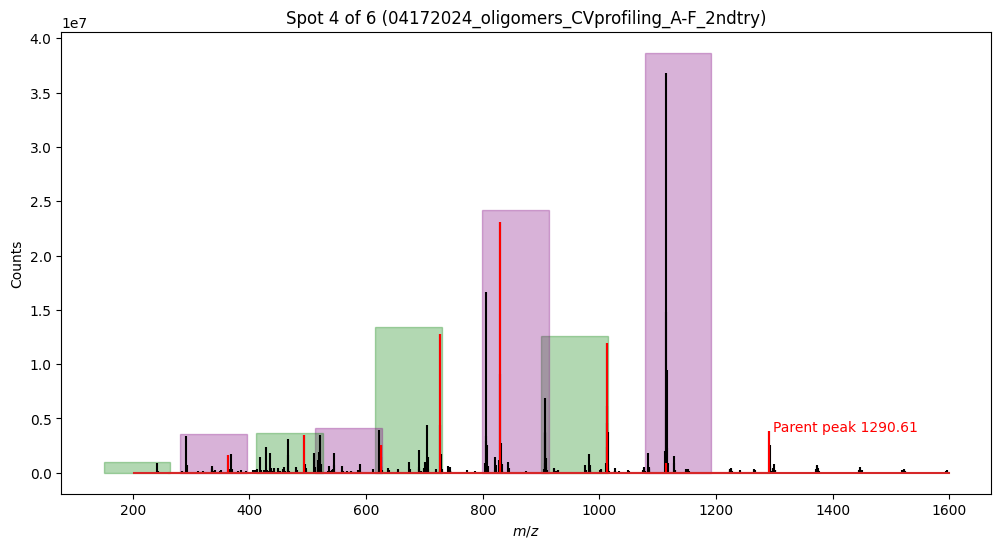

[WARNING] Small parent peaks can cause unusual results with thresholds larger than 0.01.
[DEBUG] spot_idx: 4	Parent mass in spectrum: 1421.69	Intensity: 2005645.0
[DEBUG] intensity_percent: 0.2	first intensity_threshold: 3220601.6	LargestMassPeakIntensity: 2005645.0 counts.
[DEBUG] In endcap range 232.92885800000002 - 347.186254
[DEBUG] Upperbound mass 163.057254 was lower than the minimum mass 262.084
[DEBUG] Selected masses: [1421.69, 1244.611, 1067.532, 952.468, 821.409, 694.346, 577.271, 446.213, 262.084]
	MONOMER: 1421.69 - Phe
	MONOMER: 1244.611 - Phe
	MONOMER: 1067.532 - Abu
	MONOMER: 952.468 - Ser
	MONOMER: 821.409 - Gly(allyl)
	MONOMER: 694.346 - D2Abu
	MONOMER: 577.271 - Ser
	MONOMER: 446.213 - Cha
	ENDCAP : 262.084 (target=262.084) - Tyr(OMe)


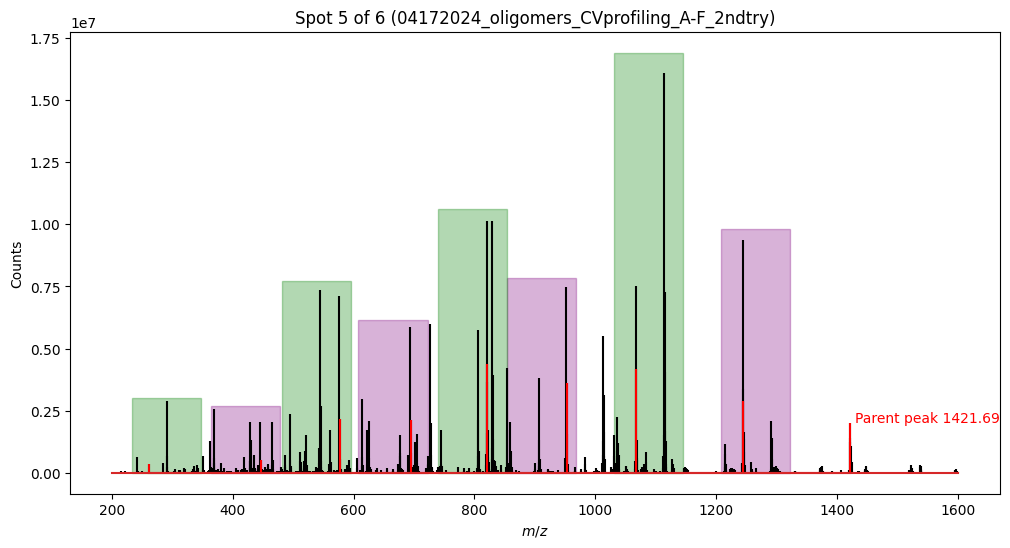

[WARNING] Small parent peaks can cause unusual results with thresholds larger than 0.01.
[DEBUG] spot_idx: 5	Parent mass in spectrum: 1526.795	Intensity: 1362912.0
[DEBUG] intensity_percent: 0.2	first intensity_threshold: 2204389.0	LargestMassPeakIntensity: 1362912.0 counts.
[DEBUG] In endcap range 179.857858 - 294.115254
[DEBUG] Upperbound mass 163.057254 was lower than the minimum mass 262.084
[DEBUG] Selected masses: [1526.795, 1349.717, 1222.653, 1037.514, 894.418, 777.342, 586.249, 393.142, 262.084]
	MONOMER: 1526.795 - Phe
	MONOMER: 1349.717 - Gly(allyl)
	MONOMER: 1222.653 - D2Cha
	MONOMER: 1037.514 - Leu
	MONOMER: 894.418 - D2Abu
	MONOMER: 777.342 - HoPhe
	MONOMER: 586.249 - D2HoPhe
	MONOMER: 393.142 - Ser
	ENDCAP : 262.084 (target=262.084) - Tyr(OMe)


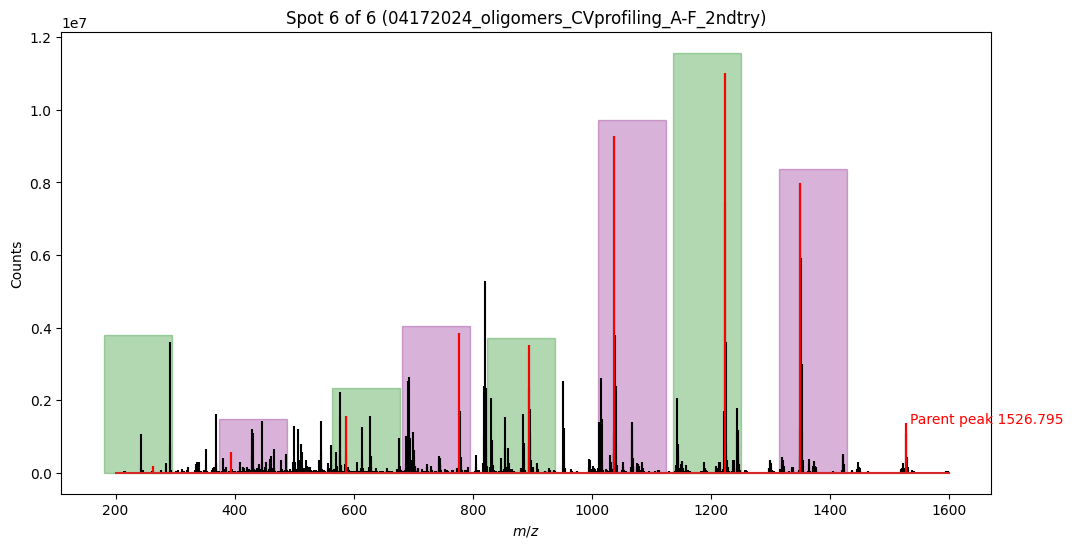

In [4]:
dataframes_for_spots = []
ms_spectra_for_spots = []
name = 'tmp'

intensity_threshold = 0.20
parent_peak_threshold = 0.04

monomer_tolerance = 1

# Iterate over every spot (which is the combined intensities over all scans which were done for that spot)
for spot_idx, scan in enumerate(combined_scans):

    # Initiate plotting here so we can plot within other functions
    fig, ax = plt.subplots(1,1, figsize = (12,6))

    ScansTemp = pd.DataFrame(list(scan.items()), columns=['Mass', 'Intensity'])

    # Find the parent oligomer mass
    parent_mass = find_parent_mass(scanData=ScansTemp, 
                                   threshold = parent_peak_threshold, 
                                   debug=debug)
    parent_mass_intensity = float(ScansTemp[ScansTemp["Mass"] == parent_mass]['Intensity'].iloc[0])

    #if i == 1:
    #    exit('DEBUG EXITING')
    if debug:
        print(f'[DEBUG] spot_idx: {spot_idx}\tParent mass in spectrum: {parent_mass}\tIntensity: {parent_mass_intensity}')

    # Find the peaks
    FoundSpectraMassesIntensity, window_bounds = identify_masses_from_sequencing(scan_data=ScansTemp, 
                                                                                 mass_monomer_definitions=MonomerMasses,
                                                                                 parent_mass=parent_mass,
                                                                                 intensity_threshold=intensity_threshold,
                                                                                 endcap_mass=endcap_mass, 
                                                                                 debug=debug)

    # Convert the mass:intensity pairs into list of masses
    FoundSpectraMasses = list(FoundSpectraMassesIntensity.keys())
    
    # Get the deltas for these
    deltas = []
    for i, m in enumerate(FoundSpectraMasses):
        if i == len(FoundSpectraMasses) - 1:
            break
        deltas.append(float(m) - FoundSpectraMasses[i + 1])
    
    # Add endcap (last mass found) to the deltas list
    deltas.append(FoundSpectraMasses[-1])
    

    MassMatches = [mass_to_monomer(x, 
                                   mass_monomer_definitions=MonomerMasses, 
                                   monomer_tolerance=monomer_tolerance, 
                                   endcap_mass=endcap_mass, 
                                   endcap_name=endcap_name, 
                                   debug=debug) for x in deltas]

    # This is just stored for printing
    results = []

    # Iterate over the masses
    for j, mass_found_in_spectrum in enumerate(FoundSpectraMasses):
        if j == len(MassMatches):
            print(f'[WARNING] There were {j} or more masses identified in spectrum while we have {len(MassMatches)} mass matches')
            break
        if MassMatches[j] == endcap_name:
            print(f'\tENDCAP : {mass_found_in_spectrum} (target={endcap_mass}) - {MassMatches[j]}')
            results.append([j, endcap_mass, endcap_name + '(endcap)'])
        else:
            results.append([j, mass_found_in_spectrum, MassMatches[j]])
            print(f'\tMONOMER: {mass_found_in_spectrum} - {MassMatches[j]}')

    result = pd.DataFrame(results, columns=['Signal No.', 'M/Z', 'Monomer lost']).set_index('Signal No.')

    # Append the result dataframe
    dataframes_for_spots.append(result)

    for i, bound_tuple in enumerate(window_bounds):
        if i % 2 == 0:
            color = 'purple'
        else:
            color = 'green'
        h = ScansTemp[(ScansTemp['Mass'] >= bound_tuple[0]) & (ScansTemp['Mass'] <= bound_tuple[1])].Intensity.max() * 1.05
        rect = plt.Rectangle((bound_tuple[0], 0), width = bound_tuple[1] - bound_tuple[0], height = h, color=color, alpha = 0.3)
        plt.gca().add_patch(rect)

    # Plot the full spectrum
    x, y = zip(*sorted(scan.items()))
    ax.stem(x, y, linefmt='black', markerfmt='')
    ax.set_title(f"Spot {spot_idx + 1} of {len(spots)} ({file.stem})")
    ax.set_ylabel('Counts')
    ax.set_xlabel(r'$m/z$')
    ax.stem(FoundSpectraMassesIntensity.keys(), FoundSpectraMassesIntensity.values(), linefmt='red', markerfmt='') #, width=1.5

    ax.text(parent_mass*1.005, parent_mass_intensity * 1.005, f'Parent peak {parent_mass}', color='red')

    tmp_image_path = Path(file.parent / str(name + f'_spot_{spot_idx + 1}' + ".png"))
    #plt.savefig(tmp_image_path, format='png', dpi = 600)
    plt.show()
    ms_spectra_for_spots.append(tmp_image_path)


